In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Define constants
IMG_SIZE = 64  # Resize images to 64x64 pixels

# Function to load and preprocess image data
def load_data(data_dir):
    data = []
    labels = []

    for word_folder in os.listdir(data_dir):
        word_path = os.path.join(data_dir, word_folder)
        if os.path.isdir(word_path):
            for image_name in os.listdir(word_path):
                image_path = os.path.join(word_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                    data.append(image)
                    labels.append(word_folder)

    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Load data
DATA_DIR = '/content/drive/MyDrive/sign_data'
data, labels = load_data(DATA_DIR)

# Encode string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize pixel values to between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Output layer with softmax for multiclass classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the trained model
model.save('sign_language_cnn_model.h5')

# Example usage of the trained model for prediction
def detect_sign_cnn(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match model input shape
    image = image / 255.0  # Normalize

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    # Convert predicted_class back to the original label
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    return predicted_label

# Example usage:
# Load the trained model
loaded_model = tf.keras.models.load_model('sign_language_cnn_model.h5')
print(detect_sign_cnn('/content/drive/MyDrive/sign_frames/above/00431_frame60_frame0.jpg', loaded_model))


Epoch 1/10
56/56 [==============================] - 2s 29ms/step - loss: 1.5349 - accuracy: 0.4437 - val_loss: 0.8623 - val_accuracy: 0.6329
Epoch 2/10
56/56 [==============================] - 1s 23ms/step - loss: 0.6413 - accuracy: 0.7708 - val_loss: 0.5707 - val_accuracy: 0.7973
Epoch 3/10
56/56 [==============================] - 1s 23ms/step - loss: 0.3653 - accuracy: 0.8677 - val_loss: 0.4144 - val_accuracy: 0.8896
Epoch 4/10
56/56 [==============================] - 1s 23ms/step - loss: 0.2699 - accuracy: 0.9026 - val_loss: 0.1808 - val_accuracy: 0.9392
Epoch 5/10
56/56 [==============================] - 1s 25ms/step - loss: 0.1649 - accuracy: 0.9448 - val_loss: 0.1780 - val_accuracy: 0.9212
Epoch 6/10
56/56 [==============================] - 1s 24ms/step - loss: 0.1325 - accuracy: 0.9550 - val_loss: 0.1456 - val_accuracy: 0.9685
Epoch 7/10
56/56 [==============================] - 1s 25ms/step - loss: 0.0762 - accuracy: 0.9775 - val_loss: 0.1131 - val_accuracy: 0.9572
Epoch 8/10
56

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 70ms/step
accomplish


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Define constants
IMG_SIZE = 64  # Resize images to 64x64 pixels

# Function to load and preprocess image data
def load_data(data_dir):
    data = []
    labels = []

    for word_folder in os.listdir(data_dir):
        word_path = os.path.join(data_dir, word_folder)
        if os.path.isdir(word_path):
            for image_name in os.listdir(word_path):
                image_path = os.path.join(word_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                    data.append(image)
                    labels.append(word_folder)

    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Load data
DATA_DIR = 'E:\signproject\data150'
data, labels = load_data(DATA_DIR)

# Encode string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Save the label encoder for later use
np.save('classes11150.npy', label_encoder.classes_)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize pixel values to between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Output layer with softmax for multiclass classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the trained model
model.save('sign_language_cnn_model_word11150.h5')

# Example usage of the trained model for prediction
def detect_sign_cnn(image_path, model, label_encoder):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match model input shape
    image = image / 255.0  # Normalize

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    # Convert predicted_class back to the original label
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    return predicted_label

# Load the trained model
loaded_model = tf.keras.models.load_model('sign_language_cnn_model_word11150.h5')

# Load the label encoder classes
classes = np.load('classes11150.npy')

# Create LabelEncoder instance and load saved classes
label_encoder = LabelEncoder()
label_encoder.classes_ = classes

# Example usage:
image_path = 'e:\signproject\01610_frame8.jpg'
predicted_word = detect_sign_cnn(image_path, loaded_model, label_encoder)
print(f"Predicted word: {predicted_word}")


d:\trylast\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.1378 - loss: 4.1885 - val_accuracy: 0.6167 - val_loss: 1.5148
Epoch 2/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.6996 - loss: 1.1098 - val_accuracy: 0.7978 - val_loss: 0.7116
Epoch 3/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.8465 - loss: 0.5327 - val_accuracy: 0.8569 - val_loss: 0.4878
Epoch 4/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.8986 - loss: 0.3357 - val_accuracy: 0.8915 - val_loss: 0.3667
Epoch 5/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9294 - loss: 0.2256 - val_accuracy: 0.9004 - val_loss: 0.3382
Epoch 6/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9412 - loss: 0.1787 - val_accuracy: 0.9183 - val_loss: 0.2925
Epoch 7/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9529 - loss: 0.1546 - val_accuracy: 0.9117 - val_loss: 0.3143
Epoch 8/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9550 -

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:
# prompt: check the model accuracy

_, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9240 - loss: 0.3033
Test accuracy: 0.9286242723464966


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

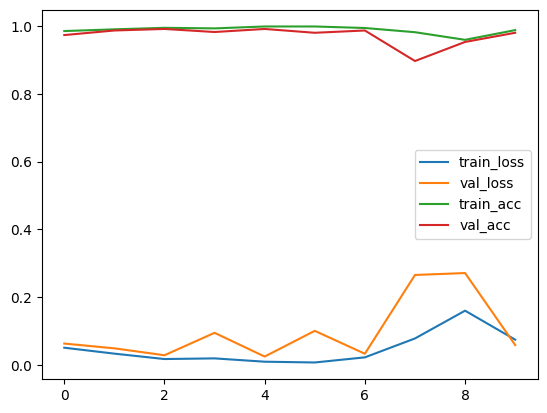

In [ ]:
# prompt: check  losses and other thing of model

# Print model summary
model.summary()

# Access training history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming you have your labels (y_train or y_data in general)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the labels
label_encoder.fit(y_train)

# Save the LabelEncoder classes for later use
np.save('classes.npy', label_encoder.classes_)

# You can now proceed with model training


In [ ]:
import numpy as np
import cv2
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('sign_language_cnn_model.h5')

# Load the saved classes (ensure this contains the actual words, not just numbers)
classes = np.load('classes.npy')

# Function to predict the word from an image
def predict_word(image_path, model, classes):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))  # Assuming your model input size is 64x64
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(image)
    predicted_class_index = np.argmax(prediction)  # Get the index of the highest predicted score

    # Get the corresponding word from the classes
    predicted_word = classes[predicted_class_index]  # Get the word based on the index

    return predicted_word

# Example usage
image_path = '/content/drive/MyDrive/sign_frames/abdomen/00335_frame13.jpg'
predicted_word = predict_word(image_path, loaded_model, classes)
print(f"Predicted word: {predicted_word}")


1/1 [==============================] - 0s 72ms/step
Predicted word: abdomen


In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('sign_language_cnn_model.h5')

# Load the saved classes
classes = np.load('classes.npy', allow_pickle=True)  # Ensure classes.npy contains the names of the actions

# Function to predict the word from an image
def predict_word(image_path, model, classes):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    predicted_word = classes[predicted_class]  # Fetch the word from the classes array using the predicted index
    return predicted_word

# Example usage
image_path = '/content/drive/MyDrive/sign_frames/above/00431_frame60_frame0.jpg'  # Replace with the actual image path
predicted_word = predict_word(image_path, loaded_model, classes)
print(f"Predicted word: {predicted_word}")


1/1 [==============================] - 0s 71ms/step
Predicted word: 8


In [ ]:
# prompt: write open camera real time and prediction

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model and classes
loaded_model = load_model('sign_language_cnn_model.h5')
classes = np.load('classes.npy', allow_pickle=True)

# Function to preprocess the frame
def preprocess_frame(frame):
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
  frame = frame / 255.0
  frame = np.expand_dims(frame, axis=0)
  return frame

# Function to predict the sign from the frame
def predict_sign(frame, model, classes):
  preprocessed_frame = preprocess_frame(frame)
  prediction = model.predict(preprocessed_frame)
  predicted_class = np.argmax(prediction)
  predicted_sign = classes[predicted_class]
  return predicted_sign

# Open the default camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while(True):
  # Read a frame from the camera
  ret, frame = cap.read()
  if not ret:
    break

  # Flip the frame horizontally
  frame = cv2.flip(frame, 1)

  # Predict the sign from the frame
  predicted_sign = predict_sign(frame, loaded_model, classes)

  # Display the predicted sign on the frame
  cv2.putText(frame, predicted_sign, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

  # Display the resulting frame
  cv2.imshow('Sign Language Recognition', frame)

  # Break the loop if 'q' is pressed
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# Release the camera and destroy all windows
cap.release()
cv2.destroyAllWindows()
